# Visual Analysis of wildfire activities in Australia 

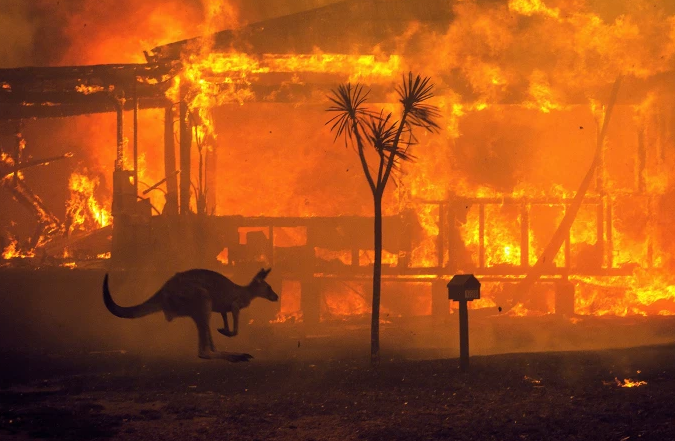

## 1. Objectives

**Practise using visualization libraries** such as Matplotlib, Pandas, Seaborn and Folium **to perform visual analysis and create informative plots and charts about fires across Australia during 2015-2020.**

## 2. Dataset information

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005 till end of 2020. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations

## 3. Coding in Python

### 3.1 Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline
import requests

import warnings
warnings.filterwarnings("ignore")

### 3.2 Import dataset

In [2]:
# URL of the CSV file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"


# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content of the response to a file
    with open('wildfires.csv', 'wb') as f:
        f.write(response.content)
    
    # Read the downloaded CSV file into a pandas DataFrame
    df = pd.read_csv('wildfires.csv')
    
    print("CSV file downloaded and read successfully.")
else:
    print("Failed to download CSV file.")

CSV file downloaded and read successfully.


### 3.3 Quick overview and cleaning of dataset

In [3]:
df.head(10)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R
5,NSW,1/9/2005,13.721429,314.757143,64.542857,83.142857,6.175990,38.142857,7,R
6,NSW,1/10/2005,16.625455,324.800000,58.554545,91.454545,6.088738,37.072727,11,R
7,NSW,1/11/2005,32.784375,318.446875,66.812500,91.000000,10.132456,102.666667,16,R
8,NSW,1/12/2005,16.486154,323.238462,40.607692,87.769231,8.623165,74.358974,13,R
9,NSW,1/13/2005,42.640000,325.376667,87.573333,86.666667,7.499206,56.238095,15,R


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               26406 non-null  object 
 1   Date                                 26406 non-null  object 
 2   Estimated_fire_area                  26406 non-null  float64
 3   Mean_estimated_fire_brightness       26406 non-null  float64
 4   Mean_estimated_fire_radiative_power  26406 non-null  float64
 5   Mean_confidence                      26406 non-null  float64
 6   Std_confidence                       24199 non-null  float64
 7   Var_confidence                       24199 non-null  float64
 8   Count                                26406 non-null  int64  
 9   Replaced                             26406 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.0+ MB


In [5]:
# Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns.

import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


In [6]:
df.describe()

,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Year,Month
count,26406.000000,26406.000000,26406.000000,26406.000000,24199.000000,24199.000000,26406.000000,26406.000000,26406.000000
mean,144.297966,319.662078,83.621258,87.574735,7.228302,56.229092,72.059305,2012.473264,6.454404
std,314.453847,8.862005,67.510022,4.371972,1.995221,25.898935,150.973128,4.592052,3.397609
min,1.000000,290.700000,0.000000,76.000000,0.000000,0.000000,1.000000,2005.000000,1.000000
25%,8.911875,313.933333,44.150391,85.000000,6.687010,44.716106,5.000000,2008.000000,4.000000
50%,38.434091,319.784412,67.133333,87.771429,7.707025,59.398234,20.000000,2013.000000,6.000000
75%,146.951278,325.403144,103.123611,90.498403,8.236665,67.842642,74.000000,2017.000000,9.000000
max,10120.943170,381.950000,2178.600000,100.000000,16.970563,288.000000,3954.000000,2020.000000,12.000000


In [7]:
# Check for missing values in dataset

df.isnull().sum()

Region                                    0
Date                                      0
Estimated_fire_area                       0
Mean_estimated_fire_brightness            0
Mean_estimated_fire_radiative_power       0
Mean_confidence                           0
Std_confidence                         2207
Var_confidence                         2207
Count                                     0
Replaced                                  0
Year                                      0
Month                                     0
dtype: int64

In [8]:
# Show how the rows with missing data in columns "Std_confidence" & "Std_confidence" appear.

df[df.isnull().any(axis=1)]

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
48,NSW,2/26/2005,1.00,303.15,8.0,79.0,NaN,NaN,1,R,2005,2
149,NSW,6/12/2005,1.00,302.55,17.9,79.0,NaN,NaN,1,R,2005,6
154,NSW,6/18/2005,5.27,301.30,71.9,77.0,NaN,NaN,1,R,2005,6
157,NSW,6/25/2005,9.60,300.70,145.9,76.0,NaN,NaN,1,R,2005,6
163,NSW,7/9/2005,2.80,294.65,37.8,79.0,NaN,NaN,1,R,2005,7
...,...,...,...,...,...,...,...,...,...,...,...,...
26327,WA,8/9/2020,2.34,300.15,30.2,85.0,NaN,NaN,1,N,2020,8
26331,WA,8/13/2020,1.10,320.35,27.1,83.0,NaN,NaN,1,N,2020,8
26332,WA,8/14/2020,1.00,302.15,15.8,77.0,NaN,NaN,1,N,2020,8
26335,WA,8/20/2020,1.92,326.85,86.2,92.0,NaN,NaN,1,N,2020,8


In [9]:
# Check for duplicated values in dataset

df[df.duplicated()]

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month


1. Dataset has no duplicated values.
2. Dataset has 2207 missing values for variables "Std_confidence" and "Var_confidence".
3. After investigation of rows with missing data, there are similar values to non-missing rows. Looks normal so we don´t delete this rows.

## 4. Visual Analysis 

### 4.1 The change in average estimated fire area over time (use pandas to plot)

Create line-chart for Estimated fire area over time (years):

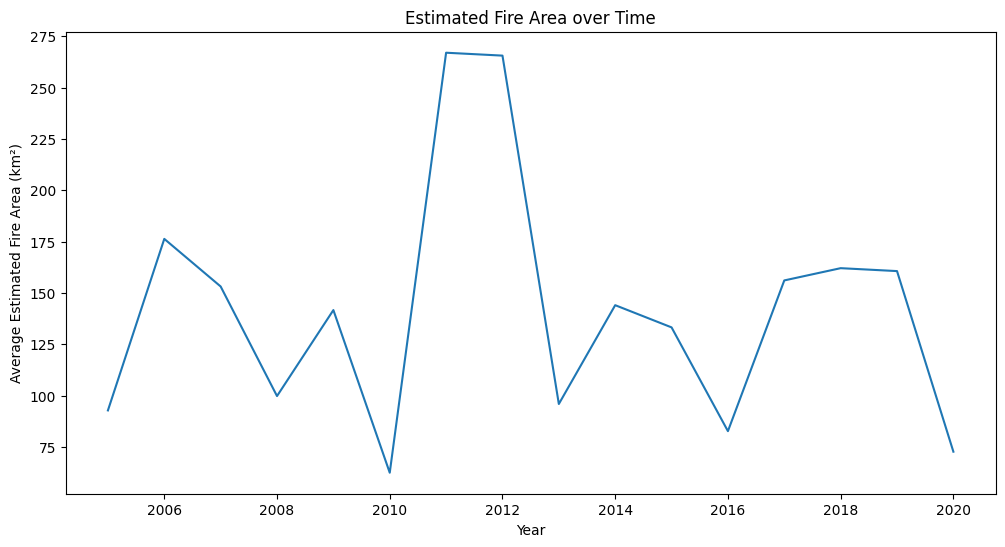

In [10]:
plt.figure(figsize=(12, 6))
df_new=df.groupby('Year')['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.

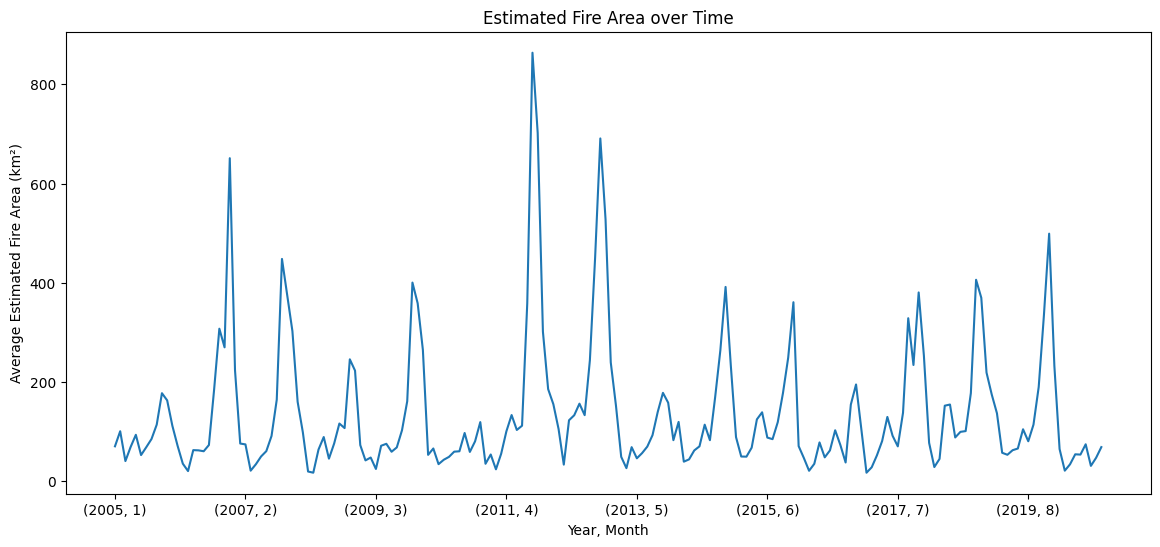

In [11]:
plt.figure(figsize=(14,6))
df_new=df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

This plot represents that the estimated fire area was on its peak after **april 2011** and **before 2012**. You can verify on google/news, this was the time of maximum wildfire hit in Australia.

### 4.2 The distribution of mean estimated fire brightness across the regions (barplot)


In [12]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

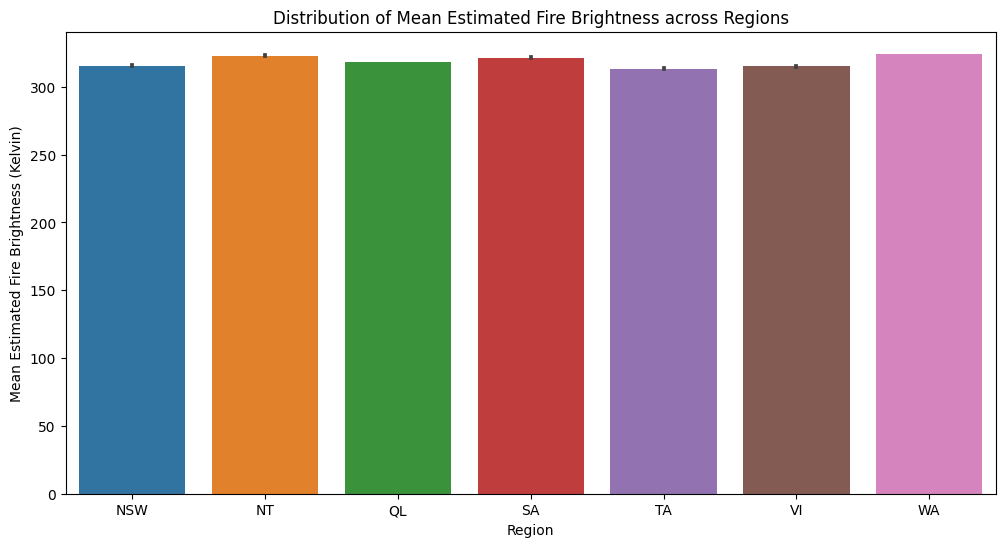

In [13]:
plt.figure(figsize=(12,6))

sns.barplot(x = "Region", y = "Mean_estimated_fire_brightness", data=df)
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

### 4.3 The proportion of count of pixels for presumed vegetation fires vary across regions

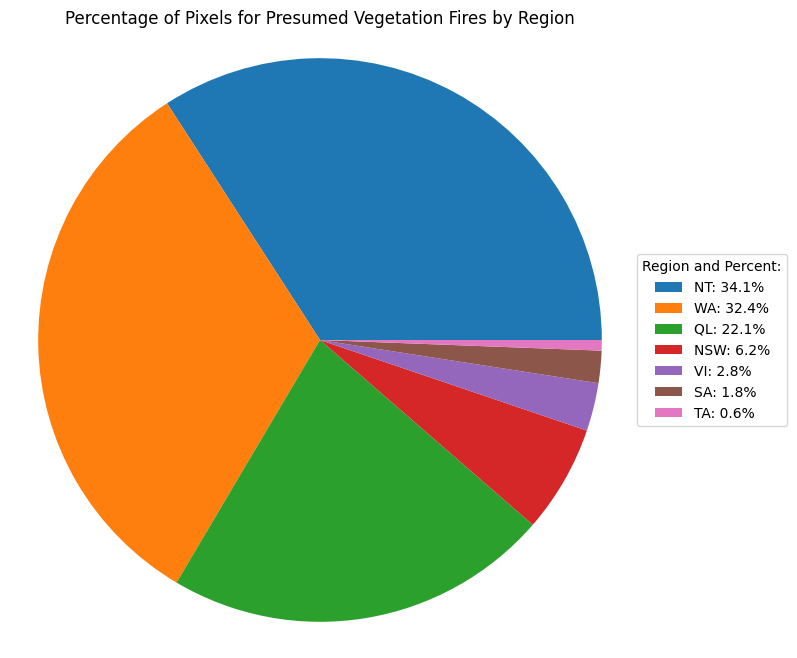

In [14]:
df_grouped_reg = df.groupby("Region")["Count"].sum()
DF_reg = pd.DataFrame(df_grouped_reg).reset_index()
DF_reg = DF_reg.sort_values(by="Count", ascending=False)

plt.figure(figsize=(8, 8)) 
plt.pie(DF_reg["Count"])  
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')  
plt.axis('equal')  

# Obtain percentage for legend:
percent_values = ['{:.1f}%'.format(value) for value in (DF_reg["Count"] / DF_reg["Count"].sum() * 100)]

legend_labels = [f'{region}: {percent}' for region, percent in zip(DF_reg["Region"], percent_values)]
plt.legend(legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Region and Percent:")

### 4.4 Histogram of the mean estimated fire brightness

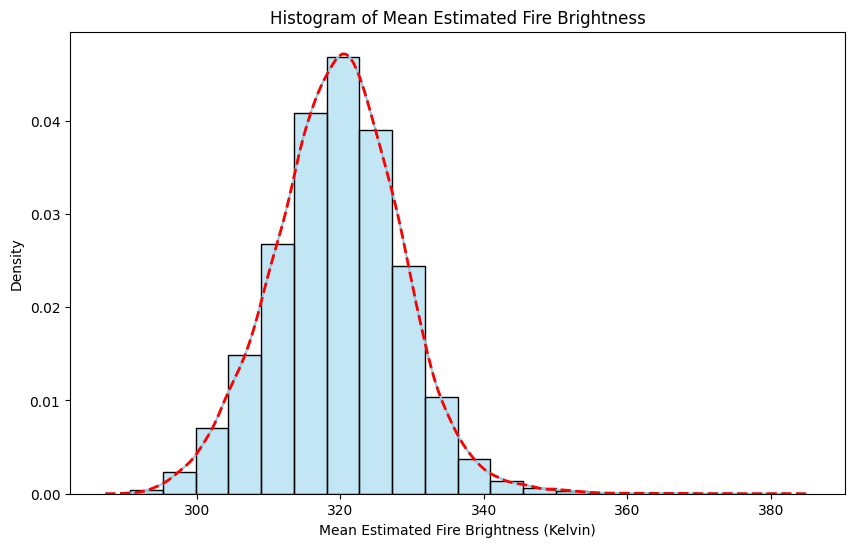

In [15]:
# Plot histogram with Seaborn histplot and normalize it
plt.figure(figsize=(10, 6))
sns.histplot(x=df['Mean_estimated_fire_brightness'], bins=20, color='skyblue', edgecolor='black', kde=True, fill=True, stat='density')

# Plot KDE separately with Seaborn kdeplot and specify the number of bins
sns.kdeplot(x=df['Mean_estimated_fire_brightness'], color='red', linestyle='--', linewidth=2)

plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Density')  # Density instead of count for normalized histogram
plt.title('Histogram of Mean Estimated Fire Brightness')

plt.show()

### 4.4 Distribution of estimated fire brightness across regions


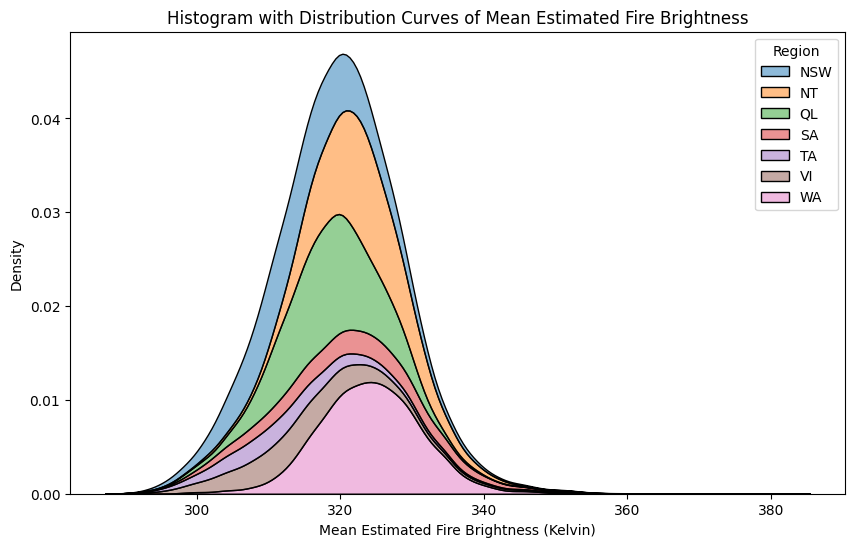

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Mean_estimated_fire_brightness', hue='Region',multiple = "stack", fill=True, alpha = 0.5)

plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Density')
plt.title('Histogram with Distribution Curves of Mean Estimated Fire Brightness')

plt.show()

### 4.5 Correlation between mean estimated fire radiative power and mean confidence level

In [17]:
df[["Mean_estimated_fire_radiative_power", "Mean_confidence"]].corr()

,Mean_estimated_fire_radiative_power,Mean_confidence
Mean_estimated_fire_radiative_power,1.000000,0.452322
Mean_confidence,0.452322,1.000000


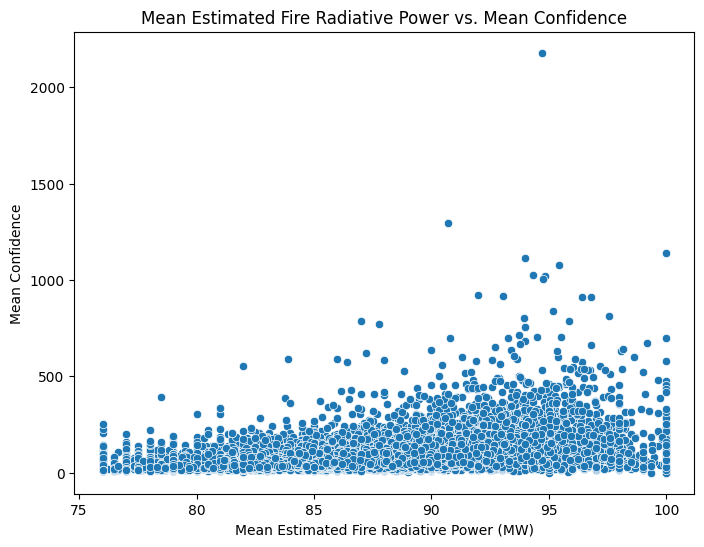

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

### 4.5 Mark these seven regions on the Map of Australia using Folium

In [19]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg.head(10)

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [20]:
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)